In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import os
import platform
import time
import datetime
import random
import math 

In [2]:
print(f"Python Version : {platform.python_version()}")
print(f"TensorFlow Version : {tf.__version__}")
print(f'Keras Version : {tf.keras.__version__}')

Python Version : 3.12.12
TensorFlow Version : 2.19.0
Keras Version : 3.10.0


In [3]:
!nvidia-smi

Tue Dec  2 06:21:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (60000, 28, 28)
y_train : (60000,)
X_test : (10000, 28, 28)
y_test : (10000,)


In [6]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = X_train.shape
IMAGE_CHANNELS = 1

print(f"Image width: {IMAGE_WIDTH}")
print(f"Image height: {IMAGE_HEIGHT}")
print(f"Image channels: {IMAGE_CHANNELS}")

Image width: 28
Image height: 28
Image channels: 1


In [7]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [8]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.DataFrame(X_test[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0
9,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0


In [10]:
plt.style.use("dark_background")

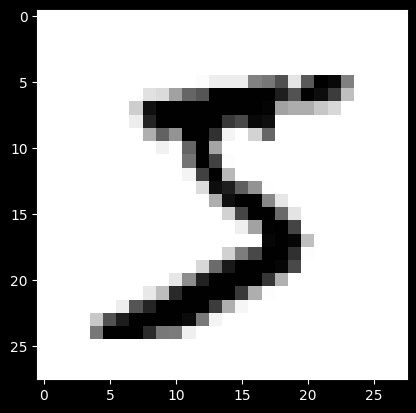

In [11]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

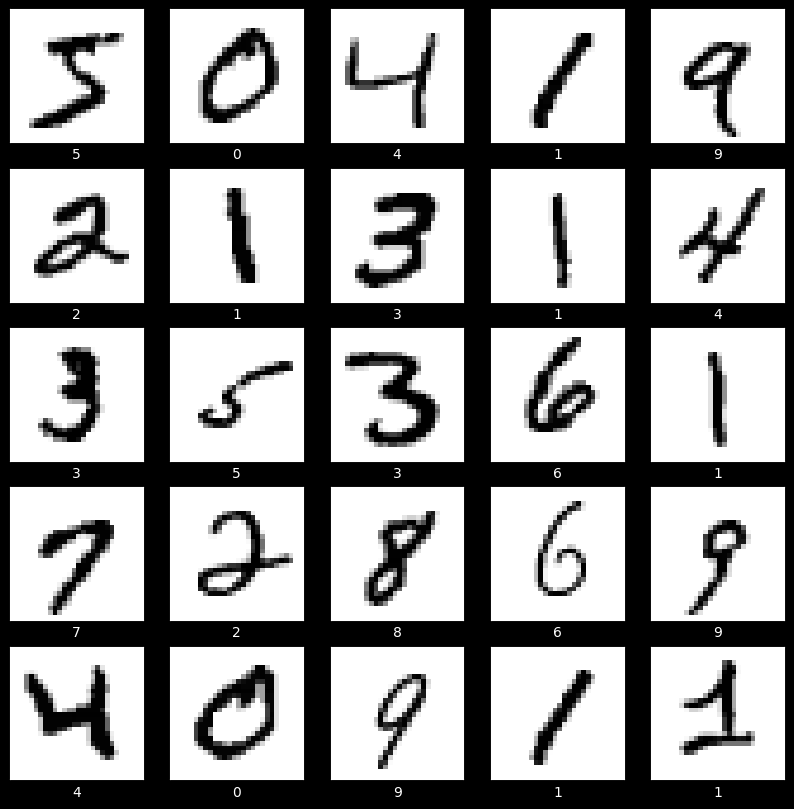

In [12]:
numbers_to_display = 25

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (10,10))

for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

In [13]:
X_train_with_channels = X_train.reshape(
    X_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

X_test_with_channels = X_test.reshape(
    X_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [14]:
print(f"X_train_with_channels : {X_train_with_channels.shape}")
print(f"X_Test_with_channels : {X_test_with_channels.shape}")

X_train_with_channels : (60000, 28, 28, 1)
X_Test_with_channels : (10000, 28, 28, 1)


In [15]:
X_train_normalized = X_train_with_channels / 255.
X_test_normalized = X_test_with_channels / 255.

In [16]:
X_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [17]:
model = tf.keras.models.Sequential(
    [
        Conv2D(
            input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
            kernel_size = 5,
            filters = 8,
            strides = 1,
            activation = tf.keras.activations.relu,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        ),

        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2)
        ),

        Conv2D(
            kernel_size = 5,
            filters = 16,
            strides = 1,
            activation = tf.keras.activations.relu,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        ),

        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2)
        ),

        Flatten(),

        Dense(
            units = 128,
            activation = tf.keras.activations.relu
        ),

        Dropout(0.2),

        Dense(
            units = 10,
            activation = tf.keras.activations.softmax,
            kernel_initializer = tf.keras.initializers.VarianceScaling()
        )
    ]
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

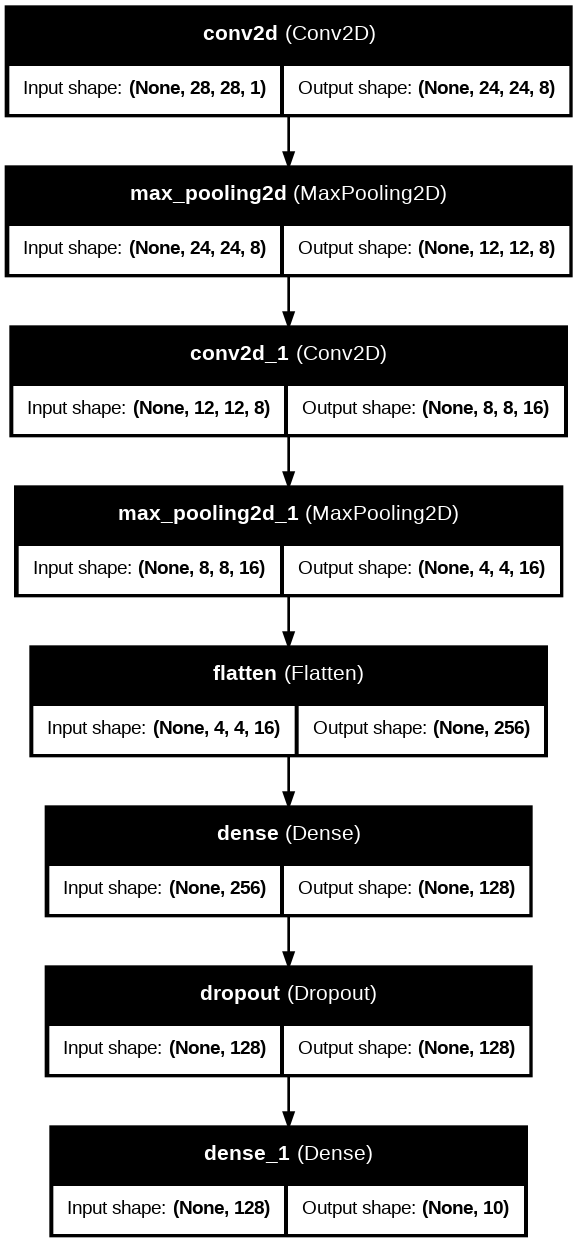

In [19]:
tf.keras.utils.plot_model(
    model,
    to_file = "model_architecture.png",
    show_shapes = True,
    show_layer_names = True,
    dpi = 96,
    rankdir = "TB"
)

In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [21]:
training_history = model.fit(
    X_train_normalized,
    y_train,
    epochs = 10,
    validation_data = (X_test_normalized, y_test),
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8610 - loss: 0.4340 - val_accuracy: 0.9815 - val_loss: 0.0571
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0683 - val_accuracy: 0.9869 - val_loss: 0.0414
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0513 - val_accuracy: 0.9888 - val_loss: 0.0326
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0367 - val_accuracy: 0.9889 - val_loss: 0.0325
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9879 - val_loss: 0.0369
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0283 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0228 - val_accuracy: 0.9919 - val_loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9937 - loss: 0.0188 

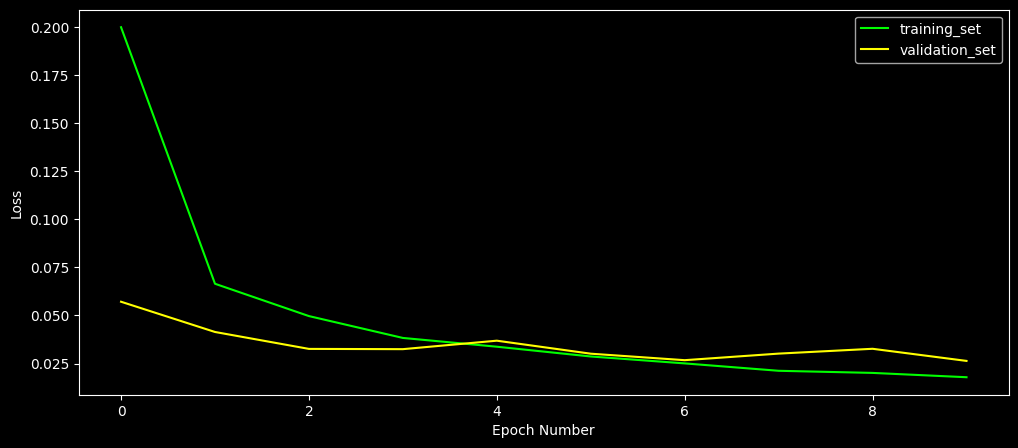

In [22]:
plt.figure(figsize = (12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], color = 'lime', label = "training_set")
plt.plot(training_history.history['val_loss'], color = 'yellow', label = "validation_set")
plt.legend()
plt.show()

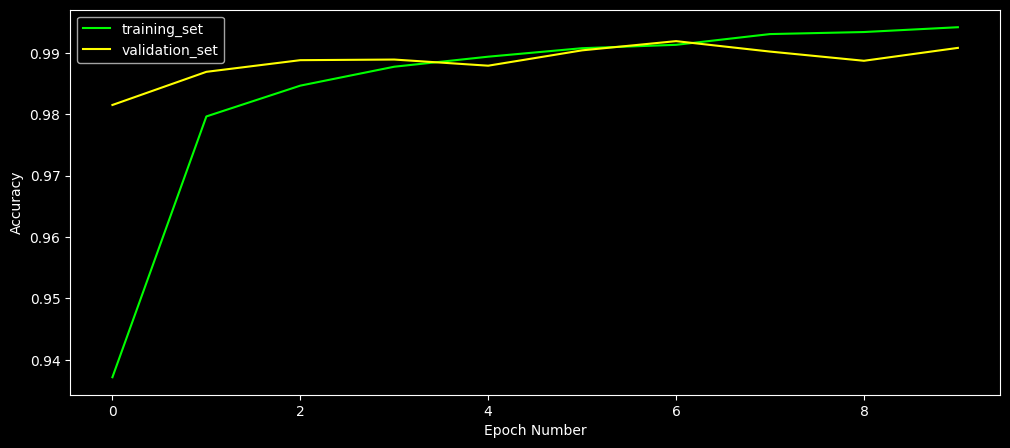

In [23]:
plt.figure(figsize = (12,5))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], color = 'lime', label = "training_set")
plt.plot(training_history.history['val_accuracy'], color = 'yellow', label = "validation_set")
plt.legend()
plt.show()

In [24]:
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train)

print(f"Training Loss : {train_loss}")
print(f"Training Accuracy : {train_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0076
Training Loss : 0.007990207523107529
Training Accuracy : 0.9973000288009644


In [25]:
validation_loss, validation_accuracy = model.evaluate(X_test_normalized, y_test)

print(f"Training Loss : {validation_loss}")
print(f"Training Accuracy : {validation_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0346
Training Loss : 0.026347104460000992
Training Accuracy : 0.9908000230789185


In [26]:
model_name = "Subhadip_Hensh_MNIST_CNN.keras"
model.save("Subhadip_Hensh_MNIST_CNN.keras")

In [27]:
loaded_model = tf.keras.models.load_model("Subhadip_Hensh_MNIST_CNN.keras")

In [28]:
predictions_one_hot = loaded_model.predict([X_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
print(f"predictions_one_hot : {predictions_one_hot.shape}")

predictions_one_hot : (10000, 10)


In [30]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.386425e-14,1.065583e-08,1.511697e-11,1.174866e-10,4.022920e-11,8.949831e-16,5.063900e-19,1.000000e+00,1.731398e-11,1.114443e-08
1,1.160783e-09,6.360299e-10,1.000000e+00,1.591839e-14,1.073557e-12,1.714131e-15,1.556127e-10,5.238552e-13,8.451176e-12,6.467973e-16
2,3.962550e-08,9.999977e-01,2.121057e-08,1.572884e-12,6.644365e-07,1.382486e-07,4.651503e-07,4.094189e-07,5.599013e-07,2.705178e-09
3,9.999996e-01,2.472037e-11,6.015099e-08,6.694130e-12,3.720038e-11,4.379712e-09,7.988525e-08,6.198815e-10,2.700343e-08,1.399218e-07
4,6.618233e-12,4.584321e-10,4.672296e-10,8.300537e-16,9.999992e-01,3.272665e-12,1.441540e-08,1.726457e-11,9.331581e-09,7.849119e-07
...,...,...,...,...,...,...,...,...,...,...
9995,5.618259e-13,4.149465e-11,1.000000e+00,6.402579e-15,3.368264e-15,5.229363e-22,4.479819e-18,9.650652e-10,1.481833e-12,2.520845e-16
9996,1.811209e-12,6.721080e-09,3.375963e-13,9.999914e-01,1.689577e-14,8.613360e-06,3.337989e-12,7.197178e-15,1.475074e-10,2.960405e-08
9997,2.231497e-16,4.117753e-12,3.835399e-13,1.499802e-18,9.999999e-01,1.168468e-14,1.509864e-11,6.189994e-13,1.335954e-07,6.028457e-12
9998,6.985260e-14,1.464658e-16,9.454760e-20,2.863647e-10,1.505706e-18,9.999998e-01,2.507569e-10,5.207450e-20,2.011532e-07,1.426503e-12


In [31]:
predictions_one_hot.sum(axis = 1)[0]

np.float32(1.0)

In [32]:
for i in range(10):
    print(f"{i} row sum is : {predictions_one_hot.sum(axis = 1)[0]}")

0 row sum is : 1.0
1 row sum is : 1.0
2 row sum is : 1.0
3 row sum is : 1.0
4 row sum is : 1.0
5 row sum is : 1.0
6 row sum is : 1.0
7 row sum is : 1.0
8 row sum is : 1.0
9 row sum is : 1.0


In [33]:
predictions = np.argmax(predictions_one_hot, axis = 1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [34]:
for i in range(10):
    print(predictions[i], end = ",")

7,2,1,0,4,1,4,9,5,9,

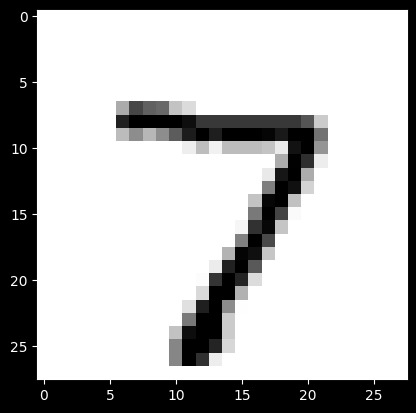

In [35]:
plt.imshow(X_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap = plt.cm.binary)

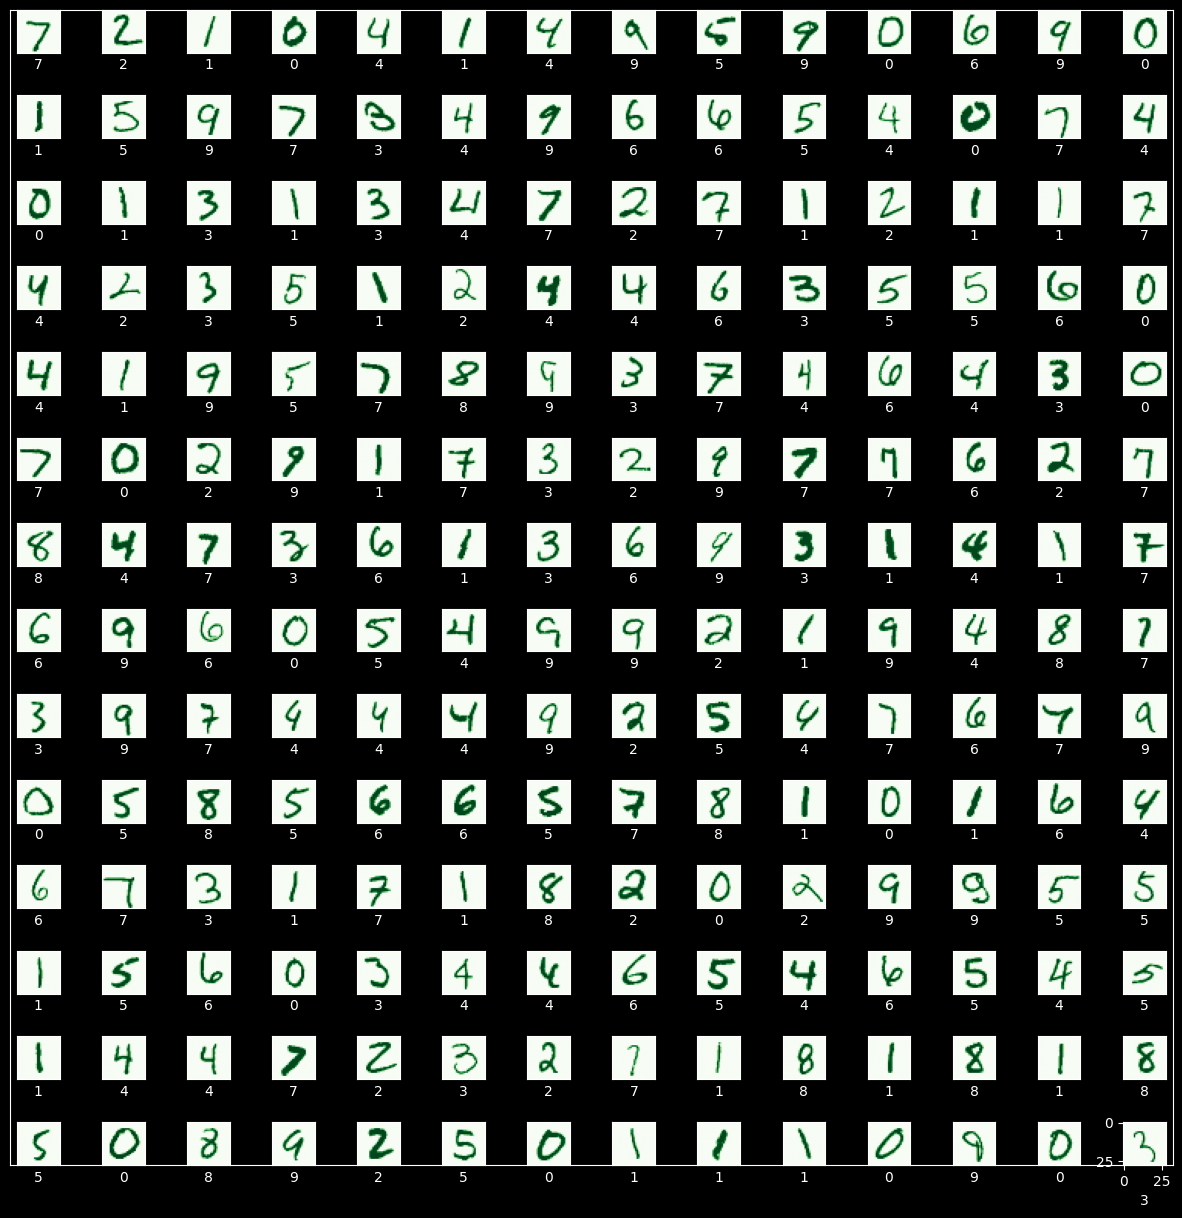

In [36]:
numbers_to_display = 196

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize = (15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = "Greens" if predicted_label == y_test[plot_index] else "Reds"
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap = color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace = 1, wspace = 0.5)
plt.show()

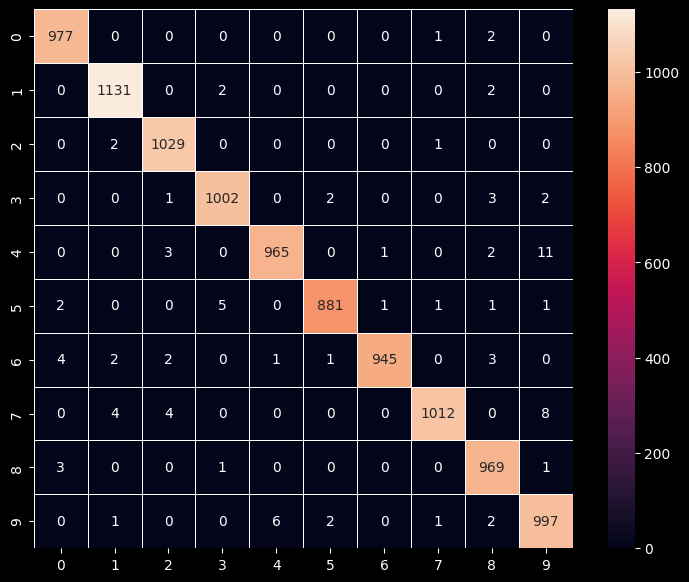

In [37]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize = (9, 7))

sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = 0.5,
    fmt = "d",
    square = True,
    ax = ax
)

plt.show()

In [38]:
import cv2

In [39]:
print("Current working directory:", os.getcwd())
print("Files in directory:", os.listdir())

Current working directory: /content
Files in directory: ['.config', 'Subhadip_Hensh_MNIST_CNN.keras', 'model_architecture.png', 'sample_data']


In [43]:
for root, dirs, files in os.walk("/", topdown=True):
    print(root)
    break

/


In [44]:
print(">>> ROOT DIRS")
!ls /

print("\n>>> CHECK CONTENT")
!ls /content || true

print("\n>>> CHECK COMMON LOCATIONS")
for p in ["/home", "/home/ubuntu", "/root", "/mnt", "/mnt/data", "/workspace", "/kaggle", "/kaggle/working", "/kaggle/input"]:
    print(f"\n--- {p} ---")
    !ls {p} || true

print("\n>>> SEARCHING FOR MNIST_input.jpg")
!find / -name "MNIST_input.jpg" 2>/dev/null

>>> ROOT DIRS
bin			    kaggle		      opt		 sys
boot			    lib			      proc		 tmp
content			    lib32		      python-apt	 tools
cuda-keyring_1.1-1_all.deb  lib64		      python-apt.tar.xz  usr
datalab			    libx32		      root		 var
dev			    media		      run
etc			    mnt			      sbin
home			    NGC-DL-CONTAINER-LICENSE  srv

>>> CHECK CONTENT
model_architecture.png	sample_data  Subhadip_Hensh_MNIST_CNN.keras

>>> CHECK COMMON LOCATIONS

--- /home ---

--- /home/ubuntu ---
ls: cannot access '/home/ubuntu': No such file or directory

--- /root ---

--- /mnt ---

--- /mnt/data ---
ls: cannot access '/mnt/data': No such file or directory

--- /workspace ---
ls: cannot access '/workspace': No such file or directory

--- /kaggle ---
input

--- /kaggle/working ---
ls: cannot access '/kaggle/working': No such file or directory

--- /kaggle/input ---

>>> SEARCHING FOR MNIST_input.jpg


In [ ]:
try:
    image = cv2.imread("MNIST_input.jpg")
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
except Exception as e:
    print(f"Error loading image : {e}")

if image is None:
    print("FATAL ERROR : Image could not be loaded. Check the file name and path.")
else:
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []
    contoured_image = image.copy()

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        
        if w < 15 or h < 15:
            continue

        cv2.rectangle(contoured_image, (x, y), (x + w, y + h), color = (0, 255, 0), thickness = 2)

        digit = thresh[y : y + h, x : x + w]
        
        resized_digit = cv2.resize(digit, (18, 18), interpolation = cv2.INTER_AREA)
        
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values = 0)

        normalized_digit = padded_digit / 255.0
        
        preprocessed_digits.append(normalized_digit)



    print("\n\n----------------Contoured Image (Rotated)--------------------")
    plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
    plt.show()

    print("\n\n\n------------------- Making Predictions ----------------------")
    preprocessed_digits = sorted(preprocessed_digits, key = lambda x : np.mean(x) * -1)

    for i, digit in enumerate(preprocessed_digits):
        input_tensor = digit.reshape(1, 28, 28, 1)

        prediction = loaded_model.predict(input_tensor, verbose = 0)
        final_output = np.argmax(prediction)

        print(f"\n--- Digit {i + 1} ---")
        plt.imshow(digit.reshape(28, 28), cmap = 'gray')
        plt.title(f"Predicted Digit : {final_output}")
        plt.show()

        print(f"Final Output : {final_output}")
        print(f"Prediction (Softmax) :\n{prediction}")
        
        hard_maxed_prediction = np.zeros(prediction.shape)
        hard_maxed_prediction[0][final_output] = 1
        print(f"Hard-maxed Prediction :\n{hard_maxed_prediction}")

    print("-" * 100)

FATAL ERROR : Image could not be loaded. Check the file name and path.


[ WARN:0@2828.147] global loadsave.cpp:275 findDecoder imread_('MNIST_input.jpg'): can't open/read file: check file path/integrity
